# Dataframes con el módulo `pandas`

## Introducción

**Dataframe.** Es una estructura bidimensional mutable de datos con los ejes etiquetados donde

- cada fila representa una observación diferente
- cada columna representa una variable diferente

En `Python`, para definir un dataframe, en primer lugar necesitamos importar el módulo `pandas`.

In [4]:
# Descomentar y ejecutar en caso de no tener instalados los siguientes modulos
#%pip install matplotlib
#%pip install numpy
#%pip install pandas
#%pip install seaborn
#%pip install Faker
#%pip install --upgrade xlrd

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
#Importar librerias necesarias para la practica
import pandas as pd # normalmente pandas se renombra como pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame

# Manipulación de datos con Pandas

`pandas` es una librería de Python que nos proporciona estructuras y herramientas de alto nivel orientadas al análisis de datos y extracción de información.

A continuación, si queremos un dataframe de 5 filas y 2 columnas, podemos hacerlo a partir de un diccionario, una lista de listas, una lista de diccionarios, etc.



Algunas de sus principales características son las siguientes:

* Define el **`DataFrame`**, un tipo de datos abstracto, que facilita la **recuperación** y **manipulación** de datos.
* Incorpora funcionalidad para el **tratamiento de valores ausentes** (nulos).
* Incorpora funciones para la __*limpieza* de datos__.
* Soporta una gran variedad de **formatos de entrada y salida** soportados: JSON, CSV, TSV, SQL, Excel, etc.
* Incluye operaciones para **concatenar, combinar, particionar** DataFrames, así como para la obtención de **agregaciones** sobre ellos.
* Altamente **optimizada**.

Podemos imaginar un DataFrame como una tabla de una base de datos relacional. Un DataFrame contendrá un conjunto de **columnas** nombradas, con un tipo de datos asociado. Cada una de estas columnas estará implementada por un objeto de tipo `Series` y todas ellas estarán alineadas por una etiqueta de índice, a través de la cual podremos recuperar los valores.

## Construcción y estructura de un DataFrame

### Inicialización de un DataFrame

Un `DataFrame` puede crearse a partir de una lista de diccionarios:

In [6]:
pd.DataFrame([{"id": 1, "test": "prueba", "value": "ok"}, {"id": 2, "test": "otro", "value": "no"}])

,id,test,value
0,1,prueba,ok
1,2,otro,no


También puede crearse a partir de un diccionario de listas:

In [7]:
pd.DataFrame({"id": [1, 2], "test": ["prueba", "otro"], "value": ["ok", "no"]})

,id,test,value
0,1,prueba,ok
1,2,otro,no


También puede crearse a partir de listas:

In [8]:
pd.DataFrame([[1,"prueba","ok"], [2, "otro", "no"]], columns=["id", "test", "value"])

,id,test,value
0,1,prueba,ok
1,2,otro,no


Y también puede hacerse a partir de objetos tipo `Serie` (recordemos que cada `Serie` representa una **columna** en el **DataFrame**), Lo veremos más adelante. 

---

#### Ejemplo 1

Vamos a crear un dataframe de 5 filas y 2 columnas a partir de un diccionario.

Para ello, primero creamos un diccionario donde las claves serán los nombres de las columnas y los valores serán listas, con tantos elementos como número de filas queramos.

Finalmente, convertimos ese diccionario a dataframe con la función `DataFrame()` de `pandas`:

In [9]:
data = {"x": [1, 2, 3, 4, 5], "y": [2, 4, 6, 8, 10]}
df1 = pd.DataFrame(data = data)
print(df1)

   x   y
0  1   2
1  2   4
2  3   6
3  4   8
4  5  10


Como habíamos dicho, hemos creado un dataframe de 5 filas y dos columnas, llamadas `x` e `y` respectivamente.

**Observación.** Como resultado del `print()`, no solamente hemos obtenido las 5 filas y 2 columnas, sino que hay una columna adicional de 5 números ordenados verticalmete del 0 al 4. Se trata simplemente del nombre de cada fila, que por defecto es el índice de cada fila. El 0 indica la primera fila; el 1, la segunda; y así, sucesivamente.

---

#### Ejemplo 2

Vamos a crear el mismo dataframe de 5 filas y 2 columnas, pero esta vez a partir de una lista de listas.

En este caso, podemos hacerlo directamente con la función `DataFrame()` de `pandas`, usando los parámetros `data` y `columns`

In [10]:
df2 = pd.DataFrame(data = [[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]],
                   columns = ["x", "y"])
print(df2)

   x   y
0  1   2
1  2   4
2  3   6
3  4   8
4  5  10


Al parámetro `data` le hemos proporcionado una lista de 5 listas, donde cada una de las sublistas tiene 2 elementos: el perteneciente a la primera columna en la posición 0, y el perteneciente a la segunda columna en la posición 1.

Al parámetro `columns` le hemos proporcionado el nombre de las 2 columnas.



---

#### Ejemplo 3

Vamos a crear el mismo dataframe de 5 filas y 2 columnas, con la diferencia de que vamos a modificar el nombre de las filas.

Lo haremos a partir del diccionario `data` y utilizaremos el parámetro `index` de la función `DataFrame()` de `pandas`

In [11]:
df3 = pd.DataFrame(data = data, index = ["obs1", "obs2", "obs3", "obs4", "obs5"])
print(df3)

      x   y
obs1  1   2
obs2  2   4
obs3  3   6
obs4  4   8
obs5  5  10


En este caso, al parámetro `index` le hemos pasado una lista con 5 strings.

**¡Cuidado!.** Al construir un dataframe a partir de un diccionario (o cualquier objeto de `Python` que contenga algún diccionario), los nombres de las columnas son las claves del diccionario. Si quisiésemos cambiarlos con el parámetro `columns` directamente, nos pasaría lo siguiente:

In [12]:
d = {"a": [1, 2, 3],
     "b": [4, 5, 6],
     "b1": [7, 8, 9]}

df = pd.DataFrame(d, columns = ["a", "b", "c"])
print(df)

   a  b    c
0  1  4  NaN
1  2  5  NaN
2  3  6  NaN


**Observación.** Si queremos crear un dataframe a partir de un diccionario, pero queremos menos columnas que total de claves tiene el diccionario, no hay problema, siempre y cuando los nombres de las columnas indicados coincidan con las claves del diccionario

In [13]:
# Construimos un dataframe solo con las columnas a y b del diccionario d
df = pd.DataFrame(d, columns = ["a", "b"])
print(df)

   a  b
0  1  4
1  2  5
2  3  6


---

#### Ejemplo 4

Vamos a crear el mismo dataframe de 5 filas y 2 columnas, esta vez a partir de una lista de diccionarios.

In [14]:
data = [{"x": 1, "y": 2},
        {"x": 2, "y": 4},
        {"x": 3, "y": 6},
        {"x": 4, "y": 8},
        {"x": 5, "y": 10}]
df4 = pd.DataFrame(data = data)
print(df4)

   x   y
0  1   2
1  2   4
2  3   6
3  4   8
4  5  10


---

#### Ejemplo 5

Incluso podemos crear un dataframe haciendo uso de la función `zip()`.

Para ello, a partir de dos listas, creamos una lista de tuplas, que es la que proporcionamos al parámetro `data` de la función `DataFrame()` para construir el dataframe.

In [15]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

data = list(zip(x, y))
print(data)

[(1, 2), (2, 4), (3, 6), (4, 8), (5, 10)]


In [16]:
df5 = pd.DataFrame(data, columns = ["x", "y"])
print(df5)

   x   y
0  1   2
1  2   4
2  3   6
3  4   8
4  5  10


## Dimensiones del dataframe

Con el método `.shape` podemos calcular las dimensiones (`número de filas y columnas`) del dataframe.

In [17]:
df5.shape

(5, 2)

Como resultado obtenemos una tupla donde el primer elemento es el número de filas, que en nuestro caso es 5, mientras que el segundo elemento es el número de columnas, que en nuestro ejemplo era 2.

In [18]:
nrows = df5.shape[0]
ncols = df5.shape[1]
print("El número de filas de df es", nrows)
print("El número de columnas de df es", ncols)

El número de filas de df es 5
El número de columnas de df es 2


Con el método `.size` calculamos el número total de valores que tienes el dataframe ($filas \times columnas$)

In [19]:
df5.size

10

In [20]:
df5.shape[0] * df5.shape[1] == df5.size

True

Finalmente, con el método `.ndim` calculamos el número de dimensiones que tiene el dataframe. Éste siempre valdrá 2, pues consta de filas y columnas.

In [21]:
df5.ndim

2

Utilizaremos la función `len` para obtener el número de filas de un `DataFrame`:

In [22]:
len(df5)

5

Si quisiéramos obtener el número de columnas de un `DataFrame`, haremos uso de la propiedad `columns`, que nos devolverá una lista de las columnas del `DataFrame`, y la función `len`:

In [23]:
len(df5.columns)

Index(['x', 'y'], dtype='object')

## Subdataframes

**Subdataframe.** Dado un dataframe, un subdataframe no es más que la selección de unas filas y columnas en particular.




### Columnas

Dado un dataframe, podemos seleccionar una columna en particular de diversas formas:

- Indicando el nombre de la columna entre corchetes, `[]`
- Con el método `.columns[]`
- Con el método `.loc[]` (por nombre o etiqueta)
- Con el método `.iloc[]` (por posición)

In [15]:
fdata = {"Name": ["Alazne", "Bill", "Unai", "Miren"],
        "Age": [22, 28, 19, 34],
        "Pet": [True, False, False, True],
        "Height": [157, 190, 175, 164],
        "Birthday": ["Mayo", "Junio", "Agosto", "Diciembre"]}
df = pd.DataFrame(data = fdata, index = ["obs1", "obs2", "obs3", "obs4"])

In [16]:
df

,Name,Age,Pet,Height,Birthday
obs1,Alazne,22,True,157,Mayo
obs2,Bill,28,False,190,Junio
obs3,Unai,19,False,175,Agosto
obs4,Miren,34,True,164,Diciembre


In [17]:
# Seleccionamos la columna Birthday por nombre
print(df["Birthday"])

obs1         Mayo
obs2        Junio
obs3       Agosto
obs4    Diciembre
Name: Birthday, dtype: object


In [18]:
# Seleccionamos la columna Birthday con el método .columns[]
print(df[df.columns[4]])

obs1         Mayo
obs2        Junio
obs3       Agosto
obs4    Diciembre
Name: Birthday, dtype: object


In [19]:
# Seleccionamos la columna Birthday con el método .loc[]
print(df.loc[:, "Birthday"])

obs1         Mayo
obs2        Junio
obs3       Agosto
obs4    Diciembre
Name: Birthday, dtype: object


**Observación.** Al método `.loc[]` le hemos indicado que tome todas las filas con `:` en la primera posición y la columna `"Birthday"` directamente indicando su nommbre en la segunda posición.

In [20]:
# Seleccionamos la columna Birthday con el método .iloc[]
print(df.iloc[:, 4])

obs1         Mayo
obs2        Junio
obs3       Agosto
obs4    Diciembre
Name: Birthday, dtype: object


**Observación.** Al método `.iloc[]` le hemos indicado que tome todas las filas con `:` en la primera posición y la columna `"Birthday"` indicando el índice que ocupa como columna.

Si quisiésemos seleccionar más de una columna, podríamos hacerlo con todas las opciones enumeradas anteriormente, con ligeras modificaciones en algunos casos:

In [21]:
# Seleccionamos las columnas Name y Age por nombre
print(df[["Name", "Age"]])

        Name  Age
obs1  Alazne   22
obs2    Bill   28
obs3    Unai   19
obs4   Miren   34


In [22]:
# Seleccionamos las columnas Name y Age con el método .columns[]
print(df[df.columns[[0, 1]]])

        Name  Age
obs1  Alazne   22
obs2    Bill   28
obs3    Unai   19
obs4   Miren   34


**Observación.** Además, como estas dos columnas están seguidas en nuestro dataframe, podríamos también usar la sintaxis siguiente no solo en esta opción, sino también en el resto de opciones que hemos visto.

In [23]:
print(df[df.columns[0:2]])

        Name  Age
obs1  Alazne   22
obs2    Bill   28
obs3    Unai   19
obs4   Miren   34


In [24]:
# Seleccionamos las columnas Name y Age con el método .loc[]
print(df.loc[:, ["Name", "Age"]])

        Name  Age
obs1  Alazne   22
obs2    Bill   28
obs3    Unai   19
obs4   Miren   34


In [25]:
print(df.loc[:, "Name":"Age"])

        Name  Age
obs1  Alazne   22
obs2    Bill   28
obs3    Unai   19
obs4   Miren   34


**¡Cuidado!** Como podemos ver, al usar `:` con strings, el indicado a la derecha sí que es incluido.

In [26]:
# Seleccionamos las columnas Name y Age con el método .iloc[]
print(df.iloc[:, [0, 1]])

        Name  Age
obs1  Alazne   22
obs2    Bill   28
obs3    Unai   19
obs4   Miren   34


In [27]:
print(df.iloc[:, 0:2])

        Name  Age
obs1  Alazne   22
obs2    Bill   28
obs3    Unai   19
obs4   Miren   34


### Filas

Dado un dataframe, podemos seleccionar una fila en particular de diversas formas:

- Con el método `.loc[]` (por nombre o etiqueta)
- Con el método `.iloc[]` (por posición)


In [28]:
# Seleccionamos la primera observación (obs1) con el método .loc[]
print(df.loc["obs1"])

Name        Alazne
Age             22
Pet           True
Height         157
Birthday      Mayo
Name: obs1, dtype: object


In [29]:
type(df.loc["obs1"])

pandas.core.series.Series

In [30]:
# Seleccionamos la última observación con el método .iloc[]
print(df.iloc[-1])

Name            Miren
Age                34
Pet              True
Height            164
Birthday    Diciembre
Name: obs4, dtype: object


Si quisiésemos seleccionar más de una fila, podríamos hacerlo con todas las opciones enumeradas anteriormente, con ligeras modificaciones en algunos casos:

In [31]:
# Seleccionamos la segunda y tercera observación con el método .loc[]
print(df.loc[["obs2","obs3"]])

      Name  Age    Pet  Height Birthday
obs2  Bill   28  False     190    Junio
obs3  Unai   19  False     175   Agosto


**Observación.** Además, como estas dos filas están seguidas en nuestro dataframe, podríamos también usar la sintaxis siguiente no solo en esta opción, sino también en el resto de opciones que hemos visto.

In [32]:
print(df.loc["obs2":"obs3"])

      Name  Age    Pet  Height Birthday
obs2  Bill   28  False     190    Junio
obs3  Unai   19  False     175   Agosto


In [33]:
# Seleccionamos la segunda y tercera observación con el método .iloc[]
print(df.iloc[[1, 2]])

      Name  Age    Pet  Height Birthday
obs2  Bill   28  False     190    Junio
obs3  Unai   19  False     175   Agosto


In [34]:
print(df.iloc[1:3])

      Name  Age    Pet  Height Birthday
obs2  Bill   28  False     190    Junio
obs3  Unai   19  False     175   Agosto


### Filas y columnas

Para seleccionar un elemento en concreto, hay que indicar la fila y la columna y lo podemos hacer de dos formas:

- Con el método `.loc[]` (por nombre o etiqueta)
- Con el método `.iloc[]` (por índice)

In [35]:
# Seleccionamos la edad de la segunda observación con el método .loc[]
print(df.loc["obs2", "Age"])

28


In [36]:
# Seleccionamos la edad de la segunda observación con el método .iloc[]
print(df.iloc[1, 1])

28


Si queremos seleccionar un subconjunto de filas y columnas, podemos utilizar los dos métodos anteriores

In [37]:
# Seleccionamos la segunda y tercera fila y las columnas nombre y cumpleaños
# Con el método .loc[]
print(df.loc["obs2":"obs3", ["Name", "Birthday"]])

      Name Birthday
obs2  Bill    Junio
obs3  Unai   Agosto


In [38]:
# Con el método .iloc[]
print(df.iloc[1:3, [0, 4]])

      Name Birthday
obs2  Bill    Junio
obs3  Unai   Agosto


## Métodos de dataframes




### Conocer información básica

El método `info()` proporciona un resumen conciso sobre el DataFrame, y es muy útil para obtener una visión rápida de la estructura y el estado de los datos.

Detalles proporcionados por `.info()`:
* Número total de entradas (filas): Muestra cuántas filas tiene el DataFrame.
* Rango de índices: Muestra el rango de los índices (número de la primera y la última fila).
* N* ombres y tipos de columnas: Proporciona el nombre de cada columna junto con su tipo de datos.
* Número de valores no nulos por columna: Indica cuántos valores no nulos hay en cada columna, lo que es útil para detectar datos faltantes.
* Uso de memoria: Muestra cuánta memoria está utilizando el DataFrame en el sistema (esto es opcional, pero generalmente está activado por defecto).

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int64
 1   b       3 non-null      int64
dtypes: int64(2)
memory usage: 180.0 bytes


El método `describe()` proporciona estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos. Se aplica principalmente a columnas numéricas, pero si se especifica, también puede describir columnas no numéricas.

Detalles proporcionados por `.describe()`:
* count: Número de valores no nulos en la columna.
* mean: Media aritmética.
* std: Desviación estándar.
* min: Valor mínimo.
* 25%: Percentil 25 (primer cuartil).
* 50%: Percentil 50 (mediana).
* 75%: Percentil 75 (tercer cuartil).
* max: Valor máximo.

Para columnas no numéricas, `.describe()` proporciona información como:

* count: Número de valores no nulos.
* unique: Número de valores únicos.
* top: El valor más frecuente (moda).
* freq: La frecuencia del valor más frecuente.

In [42]:
df.describe()

,a,b
count,3.0,3.0
mean,2.0,5.0
std,1.0,1.0
min,1.0,4.0
25%,1.5,4.5
50%,2.0,5.0
75%,2.5,5.5
max,3.0,6.0



El método `.head()` sirve para visualizar las primeras filas del dataframe. Por defecto, se nos mostrarán las 5 primeras

In [39]:
d = {"fruit": ["sandía", "melón", "manzana", "cerezas", "plátano", "pera", "melocotón", "fresas"],
     "count": [1, 1, 6, 10, 3, 6, 4, 10]}

df = pd.DataFrame(d)

In [40]:
df.head()

,fruit,count
0,sandía,1
1,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3


Si queremos que se nos muestre un número determinado de filas, tenemos que indicarlo por parámetro:

In [41]:
df.head(3)

,fruit,count
0,sandía,1
1,melón,1
2,manzana,6


In [42]:
df.head(6)

,fruit,count
0,sandía,1
1,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6


El método `.tail()` sirve para visualizar las últimas filas del dataframe. Por defecto, se nos mostrarán las 5 últimas

In [43]:
df.tail()

,fruit,count
3,cerezas,10
4,plátano,3
5,pera,6
6,melocotón,4
7,fresas,10


Si queremos que se nos muestre un número determinado de filas, tenemos que indicarlo por parámetro:

In [44]:
df.tail(3)

,fruit,count
5,pera,6
6,melocotón,4
7,fresas,10


In [45]:
df.tail(6)

,fruit,count
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6
6,melocotón,4
7,fresas,10


El método `.copy()` nos sirve para realizar una copia de un dataframe.

Si simplemente realizamos

In [46]:
fruits = df

El dataframe llamado `fruits` es solo una referencia del dataframe original `df` pues si realizamos algún cambio en `fruits`, se realiza también en `df`

In [47]:
fruits.iloc[6, 0] = "naranja"
fruits

,fruit,count
0,sandía,1
1,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6
6,naranja,4
7,fresas,10


In [48]:
df

,fruit,count
0,sandía,1
1,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6
6,naranja,4
7,fresas,10


En cambio, si `fruits` es definido como

In [49]:
fruits = df.copy()

entonces ahora sí es una copia independiente del dataframe original y por muchos cambios que hagamos sobre dicha copia, el original se mantiene intacto

In [50]:
fruits.iloc[6, 0] = "nectarina"
fruits

,fruit,count
0,sandía,1
1,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6
6,nectarina,4
7,fresas,10


In [51]:
df

,fruit,count
0,sandía,1
1,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6
6,naranja,4
7,fresas,10


El método `.rename()` se puede utilizar tanto para cambiar las etiquetas de las filas como los nombres de las columnas.

**¡Cuidado!** Para que los cambios se guarden en el dataframe original, necesitamos indicar `inplace = True`, de lo contrario, lo único que estamos haciendo es duplicar el dataframe, cambiando el nombre de las filas o columnas

In [52]:
df.rename(columns = {"fruit": "fruta",
                     "count": "cantidad"})
df

,fruit,count
0,sandía,1
1,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6
6,naranja,4
7,fresas,10


In [53]:
# Cambiamos el nombre de las columnas al dataframe original
df.rename(columns = {"fruit": "fruta",
                     "count": "cantidad"},
          inplace = True)
df

,fruta,cantidad
0,sandía,1
1,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6
6,naranja,4
7,fresas,10


In [54]:
df.rename(index = {0: "obs1",
                   1: "obs2",
                   7: "obs8"})
df

,fruta,cantidad
0,sandía,1
1,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6
6,naranja,4
7,fresas,10


In [55]:
# Cambiamos el nombre de las filas al dataframe original
df.rename(index = {0: "obs1",
                   1: "obs2",
                   7: "obs8"},
          inplace = True)
df

,fruta,cantidad
obs1,sandía,1
obs2,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6
6,naranja,4
obs8,fresas,10


Con el método `.columns` también podemos cambiar el nombre de las columnas:

In [56]:
df.columns

Index(['fruta', 'cantidad'], dtype='object')

In [57]:
df.columns = ["FRUTA", "CANTIDAD"]
df

,FRUTA,CANTIDAD
obs1,sandía,1
obs2,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6
6,naranja,4
obs8,fresas,10


El método `.insert()` inserta una nueva columna a un dataframe existente

In [58]:
df.insert(loc = 2, column = "PRECIO", value = [2.50, 2.00, 0.35, 0.10, 0.35, 0.20, 0.15, 0.05])
df

,FRUTA,CANTIDAD,PRECIO
obs1,sandía,1,2.50
obs2,melón,1,2.00
2,manzana,6,0.35
3,cerezas,10,0.10
4,plátano,3,0.35
5,pera,6,0.20
6,naranja,4,0.15
obs8,fresas,10,0.05


Al parámetro `loc` le indicamos el índice que ocupará la nueva columna; al parámetro `column` le pasamos el nombre de la nueva columna; y al parámetro `value`, los valores para cada una de las filas.

**Observación.** Si al parámetro `loc` le pasamos un índice ya ocupado por otra columna, se desplazan la columna existente y las de índices superiores un índice a la derecha.

**Observación.** Si al parámetro `value` solo le pasamos un valor, éste será el mismo para todas las filas


In [59]:
df.insert(1, "COLOR", "rojo")
df

,FRUTA,COLOR,CANTIDAD,PRECIO
obs1,sandía,rojo,1,2.50
obs2,melón,rojo,1,2.00
2,manzana,rojo,6,0.35
3,cerezas,rojo,10,0.10
4,plátano,rojo,3,0.35
5,pera,rojo,6,0.20
6,naranja,rojo,4,0.15
obs8,fresas,rojo,10,0.05


El método `.pop()` elimina la columna que indiquemos por parámetro

In [62]:
column_popped = df.pop("COLOR")
df

,FRUTA,CANTIDAD,PRECIO
obs1,sandía,1,2.50
obs2,melón,1,2.00
2,manzana,6,0.35
3,cerezas,10,0.10
4,plátano,3,0.35
5,pera,6,0.20
6,naranja,4,0.15
obs8,fresas,10,0.05


In [63]:
column_popped

obs1    rojo
obs2    rojo
2       rojo
3       rojo
4       rojo
5       rojo
6       rojo
obs8    rojo
Name: COLOR, dtype: object

In [64]:
# Volvemos a añadir la columna recientemente eliminada al final del dataframe con una sintaxis que no habíamos visto todavía
df["COLOR"] = column_popped
df

,FRUTA,CANTIDAD,PRECIO,COLOR
obs1,sandía,1,2.50,rojo
obs2,melón,1,2.00,rojo
2,manzana,6,0.35,rojo
3,cerezas,10,0.10,rojo
4,plátano,3,0.35,rojo
5,pera,6,0.20,rojo
6,naranja,4,0.15,rojo
obs8,fresas,10,0.05,rojo


El método `.rank()` devuelve un ranking.

Si por ejemplo queremos un ranking por fruta, el método `.rank()` nos devolverá una columna de posiciones correspondientes a la posición que ocupa cada fruta si estas son ordenadas alfabéticamente

**Observación.** El ranking empieza siempre en 1.

In [65]:
df["RANKING_FRUTA"] = df["FRUTA"].rank()
df

,FRUTA,CANTIDAD,PRECIO,COLOR,RANKING_FRUTA
obs1,sandía,1,2.50,rojo,8.0
obs2,melón,1,2.00,rojo,4.0
2,manzana,6,0.35,rojo,3.0
3,cerezas,10,0.10,rojo,1.0
4,plátano,3,0.35,rojo,7.0
5,pera,6,0.20,rojo,6.0
6,naranja,4,0.15,rojo,5.0
obs8,fresas,10,0.05,rojo,2.0


Con el parámetro `ascending`, que por defecto vale `True`, podemos indicar si queremos que el ranking sea en orden ascendente o descendente.

In [66]:
df["RANKING_PRECIO"] = df["PRECIO"].rank(ascending = False)
df

,FRUTA,CANTIDAD,PRECIO,COLOR,RANKING_FRUTA,RANKING_PRECIO
obs1,sandía,1,2.50,rojo,8.0,1.0
obs2,melón,1,2.00,rojo,4.0,2.0
2,manzana,6,0.35,rojo,3.0,3.5
3,cerezas,10,0.10,rojo,1.0,7.0
4,plátano,3,0.35,rojo,7.0,3.5
5,pera,6,0.20,rojo,6.0,5.0
6,naranja,4,0.15,rojo,5.0,6.0
obs8,fresas,10,0.05,rojo,2.0,8.0


El método `.nunique()` devuelve el conteo de cuántos valores únicos hay en cada columna

In [67]:
df.nunique()

FRUTA             8
CANTIDAD          5
PRECIO            7
COLOR             1
RANKING_FRUTA     8
RANKING_PRECIO    7
dtype: int64

Dada una columna de un dataframe, el método `.unique()` devuelve un array con los valores únicos de dicha columna

In [159]:
print(df["COLOR"].unique())

['rojo']


In [160]:
print(df["PRECIO"].unique())

[2.5  2.   0.35 0.1  0.2  0.15 0.05]


El método `.duplicated()` nos ayuda a analizar los valores duplicados. El parámetro `keep` sirve para controlar como proceder con los valores duplicados:

  * `first`: considera la primera aparición del valor repetido como único y el resto como duplicados
  * `last`: considera la última aparición del valor repetido como único y el resto como duplicados
  * `False`: considera todos los repetidos iguales como duplicados

In [68]:
bool_duplicated = df["CANTIDAD"].duplicated(keep = False)
df[bool_duplicated]

,FRUTA,CANTIDAD,PRECIO,COLOR,RANKING_FRUTA,RANKING_PRECIO
obs1,sandía,1,2.50,rojo,8.0,1.0
obs2,melón,1,2.00,rojo,4.0,2.0
2,manzana,6,0.35,rojo,3.0,3.5
3,cerezas,10,0.10,rojo,1.0,7.0
5,pera,6,0.20,rojo,6.0,5.0
obs8,fresas,10,0.05,rojo,2.0,8.0


El método `.drop_duplicates()` elimina los duplicados del dataframe. De nuevo, volvemos a tener el parámetro `keep` y el parámetro `subset` sirve para indicar las columnas a las que queremos aplicar el método:

**Observación.** Para que los cambios sean llevados a cabo en el dataframe original, habrá que indicar `inplace = True`

In [162]:
df_without_duplicates = df.drop_duplicates(subset = "CANTIDAD", keep = "first")
df_without_duplicates

,FRUTA,CANTIDAD,PRECIO,COLOR,RANKING_FRUTA,RANKING_PRECIO
obs1,sandía,1,2.50,rojo,8.0,1.0
2,manzana,6,0.35,rojo,3.0,3.5
3,cerezas,10,0.10,rojo,1.0,7.0
4,plátano,3,0.35,rojo,7.0,3.5
6,naranja,4,0.15,rojo,5.0,6.0


El método `.nsmallest()` nos devuelve las $n$ filas con menor valor de la columna que indiquemos por parámetro

In [163]:
# Queremos las 3 observaciones con menor precio
df.nsmallest(3, "PRECIO")

,FRUTA,CANTIDAD,PRECIO,COLOR,RANKING_FRUTA,RANKING_PRECIO
obs8,fresas,10,0.05,rojo,2.0,8.0
3,cerezas,10,0.10,rojo,1.0,7.0
6,naranja,4,0.15,rojo,5.0,6.0


El método `.largest()` nos devuelve las $n$ filas con mayor valor de la columna que indiquemos por parámetro

In [164]:
# Queremos las 5 observaciones con mayor cantidad
df.nlargest(5, "CANTIDAD")

,FRUTA,CANTIDAD,PRECIO,COLOR,RANKING_FRUTA,RANKING_PRECIO
3,cerezas,10,0.10,rojo,1.0,7.0
obs8,fresas,10,0.05,rojo,2.0,8.0
2,manzana,6,0.35,rojo,3.0,3.5
5,pera,6,0.20,rojo,6.0,5.0
6,naranja,4,0.15,rojo,5.0,6.0


El método `.dtypes` nos indica de qué tipo es cada columna del dataframe

In [165]:
df.dtypes

FRUTA              object
CANTIDAD            int64
PRECIO            float64
COLOR              object
RANKING_FRUTA     float64
RANKING_PRECIO    float64
dtype: object

El método `.drop()` nos permite borrar las filas o columnas que indiquemos

**¡Cuidado!** De nuevo, si queremos aplicar directamente los cambios al dataframe original, necesitamos indicar `inplace = True`

In [ ]:
# Eliminamos filas (axis = 0) por etiqueta
df_dropped = df.drop(labels = ["obs1", 4], axis = 0)
df_dropped

,FRUTA,COLOR,CANTIDAD,PRECIO
obs2,melón,rojo,1,2.00
2,manzana,rojo,6,0.35
3,cerezas,rojo,10,0.10
5,pera,rojo,6,0.20
6,naranja,rojo,4,0.15
obs8,fresas,rojo,10,0.05


In [ ]:
# Eliminamos columnas (axis = 1) por etiqueta
df_dropped = df.drop(labels = ["COLOR", "PRECIO"], axis = 1)
df_dropped

,FRUTA,CANTIDAD
obs1,sandía,1
obs2,melón,1
2,manzana,6
3,cerezas,10
4,plátano,3
5,pera,6
6,naranja,4
obs8,fresas,10


Veamos como añadir filas a un dataframe ya existente con `concat()`

In [ ]:
datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1694089]  ]
dfConcat = DataFrame(datos ,columns=['ciudades','habitantes'])
dfConcat

,ciudades,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1694089


In [ ]:
new_row = pd.DataFrame({'ciudades': ['Cáceres'], 'habitantes': [394151]})
dfConcat = pd.concat([dfConcat, new_row], ignore_index=True)
dfConcat

,ciudades,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1694089
6,Cáceres,394151


Ahora añadimos una columna con la superficie

In [ ]:
dfConcat["superficie"] = [8027, 7773, 10807,14036,5817,7306, 19868]
dfConcat

,ciudades,habitantes,superficie
0,Madrid,6507184,8027
1,Barcelona,5609350,7773
2,Valencia,2547986,10807
3,Sevilla,1939887,14036
4,Alicante,1838819,5817
5,Málaga,1694089,7306
6,Cáceres,394151,19868


Y obtenemos la densidad:

In [ ]:
dfConcat["densidad"] = dfConcat["habitantes"]/dfConcat["superficie"]
dfConcat


NameError: name 'dfConcat' is not defined

## Bucles y dataframes

Para iterar sobre las filas de un dataframe, podemos utilizar los métodos:

- `.iterrows()`
- `.itertuples()`

In [2]:
d = {"name": ["Laura", "Miren", "Eneko"],
     "surname": ["Uriarte", "Izaga", "Zen"],
     "gender": ["f", "f", "m"]}

df = pd.DataFrame(d)
df

,name,surname,gender
0,Laura,Uriarte,f
1,Miren,Izaga,f
2,Eneko,Zen,m


Usamos `.iterrows()` para obtener el índice de cada fila junto al contenido de cada una:

In [70]:
for i, j in df.iterrows():
  print("Índice de la fila: {},\n\nContenido de la fila:\n{}".format(i, j), end = "\n\n\n")

Índice de la fila: 0,

Contenido de la fila:
name         Laura
surname    Uriarte
gender           f
Name: 0, dtype: object


Índice de la fila: 1,

Contenido de la fila:
name       Miren
surname    Izaga
gender         f
Name: 1, dtype: object


Índice de la fila: 2,

Contenido de la fila:
name       Eneko
surname      Zen
gender         m
Name: 2, dtype: object




Usamos `.itertuples()` para obtener una tupla con toda la información de cada fila:

In [3]:
for i in df.itertuples():
  print("Contenido de la fila:\n{}".format(i), end = "\n\n")
  

Contenido de la fila:
Pandas(Index=0, name='Laura', surname='Uriarte', gender='f')

Contenido de la fila:
Pandas(Index=1, name='Miren', surname='Izaga', gender='f')

Contenido de la fila:
Pandas(Index=2, name='Eneko', surname='Zen', gender='m')



Para iterar sobre las columnas de un dataframe,

- creamos una lista de las columnas del dataframe y luego iterarmos sobre esa lista para obtener la información de esas columnas
- usamos el método `.iteritems()`

Creamos la lista de columnas e iteramos sobre esta:

In [72]:
columns = list(df)
print(columns)

['name', 'surname', 'gender']


In [74]:
for c in columns:
  print("Columna {}:\n{}".format(c, df[c]), end = "\n\n")

Columna name:
0    Laura
1    Miren
2    Eneko
Name: name, dtype: object

Columna surname:
0    Uriarte
1      Izaga
2        Zen
Name: surname, dtype: object

Columna gender:
0    f
1    f
2    m
Name: gender, dtype: object



Usamos `.items()` para obtener el nombre de cada columna junto al contenido de cada una:

In [75]:
for i, j in df.items():
  print("Nombre de la columna: {},\n\nContenido de la columna:\n{}".format(i, j), end = "\n\n\n")

Nombre de la columna: name,

Contenido de la columna:
0    Laura
1    Miren
2    Eneko
Name: name, dtype: object


Nombre de la columna: surname,

Contenido de la columna:
0    Uriarte
1      Izaga
2        Zen
Name: surname, dtype: object


Nombre de la columna: gender,

Contenido de la columna:
0    f
1    f
2    m
Name: gender, dtype: object




## Dataframes a partir de archivos


### Desde directorio de trabajo (con Google Drive)

Vamos a cargar el archivo llamado `characters-simpsons.csv` que tenemos guardado en una carpeta de Google Drive.

Para ello, lo primero que tenemos que hacer es conectar este notebook de Colab con Google Drive.

In [76]:
#from google.colab import drive
#drive.mount('/content/drive')
#simpsons_df = pd.read_csv("/content/drive/MyDrive/IA y Big Data/Python/Apuntes/Datos/characters-simpsons.csv")
#Las líneas comentadas son para llegar al fichero si usamos google.colab
simpsons_df = pd.read_csv("Datos/characters-simpsons.csv")
simpsons_df.head()

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN


In [77]:
simpsons_df.tail()

,id,name,normalized_name,gender
6717,5222,Ron Rabinowitz,ron rabinowitz,m
6718,5728,Martha Stewart,martha stewart,f
6719,1770,Officer Goodman,officer goodman,m
6720,1634,Evan Conover,evan conover,m
6721,1868,Agent Johnson,agent johnson,m


### Desde url

Vamos a cargar el archivo que contiene la frecuencia de aparición de las letras del alfabeto inglés. Este archivo se llama letter_frequency.csv procede de la siguiente [url](https://people.sc.fsu.edu/~jburkardt/data/csv/letter_frequency.csv)

In [78]:
letters_freq_df = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/letter_frequency.csv")
letters_freq_df.columns = ["Letra", "Frecuencia", "Porcentaje"]
letters_freq_df

,Letra,Frecuencia,Porcentaje
0,"""A""",24373121,8.1
1,"""B""",4762938,1.6
2,"""C""",8982417,3.0
3,"""D""",10805580,3.6
4,"""E""",37907119,12.6
5,"""F""",7486889,2.5
6,"""G""",5143059,1.7
7,"""H""",18058207,6.0
8,"""I""",21820970,7.3
9,"""J""",474021,0.2


## Dataframes a partir de archivos JSON

Podemos guardar la información de un archivo json en un dataframe usando el método `.read_json()`.

El archivo puede

- estar guardado en nuestro directorio de trabajo
- proceder de una url

### Desde directorio de trabajo (con Google Drive)

Vamos a cargar el archivo llamado `json_index_example.json` que tenemos guardado en la carpeta datasets de Google Drive.

Para ello, lo primero que tenemos que hacer es conectar este notebook de Colab con Google Drive.

In [79]:
#quiz_index = pd.read_json("/content/drive/MyDrive/IA y Big Data/Python/Apuntes/Datos/json_index_example.json", orient = "index")
quiz_index = pd.read_json("Datos/json_index_example.json", orient = "index")
quiz_index.head()

,Producto,Precio,Cantidad
0,Bolígrafo,1.80,3
1,Lápiz,0.30,2
2,Libreta,5.20,1
3,Agenda,9.99,1
4,Rotulador,1.15,5


#### El parámetro `orient`

En el caso de archivos json, podría darse que no tuvieran la misma configuración que nuestro ejemplo, `json_index_example.json` cuya orientación se corresponde con `index`.

El parámetro `orient` del método `.read_json()` admite otras opciones como `columns` o `values`.

Veamos ambos casos con los ficheros `json_columns_example.json` y `json_values_example.json`, respectivamente.

In [82]:
# Orientación con index
#quiz_columns = pd.read_json("/content/drive/MyDrive/Python/Apuntes/Datos/json_columns_example.json",  orient = "columns")
quiz_columns = pd.read_json("Datos/json_columns_example.json",  orient = "columns")
quiz_columns.head()

,Producto,Precio,Cantidad
0,Bolígrafo,1.80,3
1,Lápiz,0.30,2
2,Libreta,5.20,1
3,Agenda,9.99,1
4,Rotulador,1.15,5


In [83]:
# Orientación con values
#quiz_values = pd.read_json("/content/drive/MyDrive/Python/Apuntes/Datos/json_values_example.json",  orient = "values")
quiz_values = pd.read_json("Datos/json_values_example.json",  orient = "values")
quiz_values.head()

,0,1,2
0,Bolígrafo,1.80,3
1,Lápiz,0.30,2
2,Libreta,5.20,1
3,Agenda,9.99,1
4,Rotulador,1.15,5


### Desde url

Vamos a cargar el archivo json que procede de la siguiente [url](https://api.exchangerate-api.com/v4/latest/USD)

In [84]:
from_url = pd.read_json("https://api.exchangerate-api.com/v4/latest/USD")
from_url.head()

,provider,WARNING_UPGRADE_TO_V6,terms,base,date,time_last_updated,rates
AED,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2023-09-25,1695600001,3.67
AFN,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2023-09-25,1695600001,78.84
ALL,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2023-09-25,1695600001,99.95
AMD,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2023-09-25,1695600001,387.30
ANG,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2023-09-25,1695600001,1.79


### Carga de ficheros CSV con Pandas

[read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) y [read_excel](https://pythonbasics.org/read-excel/) permiten leer ficheros separados por un carácter y ficheros excel
En ambos casos devuelven un dataframe: una tabla en Pandas que representa el conjunto de datos en memoria


##### read_csv

El principal parámetro es la dirección donde se encuentra el fichero. Algunos parámetros comunes de read_csv

- sep: el separador, por defecto “,”, pero en algunos ficheos puede ser ;
- Header: para indicar si la primera línea contiene la cabecera (por defecto True)
- Thousands, decimal: separadores de miles y de decimales
- encoding: codificación de caracteres. Deber ser una codificaciones estándar


In [54]:
fichero = 'https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/ciudades_ejemplo.csv'
df = pd.read_csv(fichero)
df

,ciudades,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1641121


<a name="Carga-de-ficheros-Excel-con-Pandas"></a>
### Carga de ficheros Excel con Pandas

##### read_excel

La lectura con pd.read_excel utiliza internamente otro librería `xlrd` que habra que instalar sino está en el sistema. Este ejemplo carga un fichero con valores bursátiles

In [2]:
fichero = '0.Datos/ciudades_ejemplo.csv'
df = pd.read_csv(fichero)
df

NameError: name 'pd' is not defined

En el caso de múltiples páginas obtendremos un vector de dataframes. En este ejemplo cargamos datos de accidentes por distritos en la ciudad de Madrid. Se trata de un "libro" excel con hojas de nombre '2009', ..., '2016'

In [1]:
fichero = "0.Datos/subvenciones.xlsx"
df_acc = pd.read_excel(fichero,sheet_name='Hoja1')
df_acc

NameError: name 'pd' is not defined

La grabación de ficheros excel se realiza con la función de pandas to_excel, asociada al dataframe.

In [ ]:
df_acc.to_excel("./accidentes.xlsx")

Pandas nos permite hacer gráficas de forma muy sencilla, especialmente si el índice es de tipo fecha

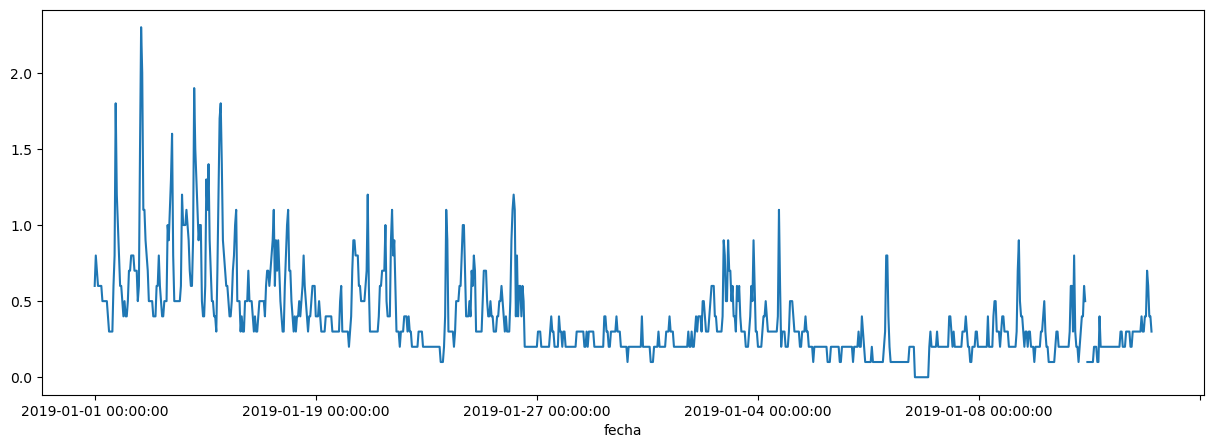

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
df2 = df[(df.fecha>'2019-01-01') & (df.fecha<'2019-02-10')] 
df2.index=df2.fecha
df2["CO"].plot(ax=ax)
plt.show()

In [ ]:
fichero = "https://raw.githubusercontent.com/ainaramu-icjardin/big_data/main/parocomunidades.csv"
df2 = pd.read_csv(fichero, encoding="latin1")
df2

,Comunidad,Periodo,Total
0,Andalucía,2019,20.80
1,Andalucía,2018,21.26
2,Andalucía,2017,24.43
3,Andalucía,2016,28.25
4,Andalucía,2015,29.83
...,...,...,...
337,Melilla,2006,9.86
338,Melilla,2005,12.33
339,Melilla,2004,12.49
340,Melilla,2003,19.88


Ver https://python.readthedocs.io/en/stable/library/codecs.html#standard-encodings para una lista completa de codificaciones

## Tratamiento de datos faltantes



Los datos faltantes, o en inglés, Missing Data, se dan cuando no hay información para uno o más elementos.

Éste es un problema muy común en la vida real.

En la librería `pandas`, identificamos los missing data con valores `NA` (Not Available) o `NaN` (Not a Number).

Para identificar valores fanltantes en un dataframe de `pandas` , podemos usar los métodos `.isnull()` o `.notnull()`

In [85]:
# Nos devuelve True allí donde hay un dato faltante
simpsons_df.isnull().head()

,id,name,normalized_name,gender
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [86]:
# Nos devuelve False allí donde hay un dato faltante
simpsons_df.notnull().head()

,id,name,normalized_name,gender
0,True,True,True,False
1,True,True,True,False
2,True,True,True,False
3,True,True,True,False
4,True,True,True,False


Existen muchas técnicas para tratar con valores faltantes: se sustituyen por la media, por la mediana, se elimina la observación, se interpolan...:

- `.fillna()`
- `.replace()`
- `.interpolate()`
- `.dropna()`

El método `.fillna()` sustituye los valores faltantes por el valor que indiquemos por parámetro

In [87]:
data = {"Primer lanzamiento": [100, 86, np.nan, 75, 97],
        "Segundo lanzamiento": [80, np.nan, 63, 81, 88],
        "Tercer lanzamiento": [93, 89, 92, 97, np.nan]
        }

points_df = pd.DataFrame(data, index = ["Jugador 1", "Jugador 2", "Jugador 3", "Jugador 4", "Jugador 5"])
points_df

,Primer lanzamiento,Segundo lanzamiento,Tercer lanzamiento
Jugador 1,100.0,80.0,93.0
Jugador 2,86.0,NaN,89.0
Jugador 3,NaN,63.0,92.0
Jugador 4,75.0,81.0,97.0
Jugador 5,97.0,88.0,NaN


In [88]:
# Sustituimos todos los NaN por 0 puntos
points_df.fillna(0)

,Primer lanzamiento,Segundo lanzamiento,Tercer lanzamiento
Jugador 1,100.0,80.0,93.0
Jugador 2,86.0,0.0,89.0
Jugador 3,0.0,63.0,92.0
Jugador 4,75.0,81.0,97.0
Jugador 5,97.0,88.0,0.0


Para sustituir valores faltantes con el método `.replace()` lo hacemos del siguiente modo: primero pasamos por parámetro el valor que queremos sustituir y luego, el valor por el cual queremos sustituirlo.

In [89]:
points_df = pd.DataFrame(data, index = ["Jugador 1", "Jugador 2", "Jugador 3", "Jugador 4", "Jugador 5"])
points_df.replace(np.nan, 0)

,Primer lanzamiento,Segundo lanzamiento,Tercer lanzamiento
Jugador 1,100.0,80.0,93.0
Jugador 2,86.0,0.0,89.0
Jugador 3,0.0,63.0,92.0
Jugador 4,75.0,81.0,97.0
Jugador 5,97.0,88.0,0.0


Si usamos el método `.interpolate()`, sustituiremos los valores `NaN` por valores interpolados. Este método consta de muchos parámetros para elegir el método (que por defecto es `linear`) por el cual llevar a cabo la interpolación.

In [90]:
points_df = pd.DataFrame(data, index = ["Jugador 1", "Jugador 2", "Jugador 3", "Jugador 4", "Jugador 5"])
points_df.interpolate()

,Primer lanzamiento,Segundo lanzamiento,Tercer lanzamiento
Jugador 1,100.0,80.0,93.0
Jugador 2,86.0,71.5,89.0
Jugador 3,80.5,63.0,92.0
Jugador 4,75.0,81.0,97.0
Jugador 5,97.0,88.0,97.0


El método `.dropna()` elimina las filas que contienen valores faltantes.

In [91]:
points_df = pd.DataFrame(data, index = ["Jugador 1", "Jugador 2", "Jugador 3", "Jugador 4", "Jugador 5"])
points_df.dropna()

,Primer lanzamiento,Segundo lanzamiento,Tercer lanzamiento
Jugador 1,100.0,80.0,93.0
Jugador 4,75.0,81.0,97.0
